In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Validation: unit-cell: In et al 2006

In et al. Three-dimensional analysis of the hot-spot fuel temperature in pebble bed and prismatic modular reactors. 2006.

In [2]:
# Geometry
rf = 1.27/2 - 0.0125 # cm
rg = 1.27/2  # cm
rc = 1.59/2  # cm
rg2 = rc + 0.01
L = 793  # cm

# flow
rho = 4.94  # [kg/m3] 70 bar, 400 C
rho /= 1e6   # [kg/cm3]

cp = 5.188  # [J/g/K] 70 MPa, 400 C
cp *= 1e3  # [J/kg/K]

rc = 1.59/2  # cm
mlc = 0.0176  # kg/s
v = mlc/rho/np.pi/rc**2
print('v: ', v, 'cm/s')

v:  1794.3269863206274 cm/s


In [3]:
# Calculates film thermal conductivity
# Material properties: values from tak et al 2008

# Fuel
# T = 400, 1600
kf = np.array([6., 11.])  # [W/m/K]
kf *= 1e-2  # [W/cm/K]

# Gap
# T = 400, 1600
kg = 1e-2*np.array([27.5, 60])  # [W/m/K]
kg *= 1e-2  # [W/cm/K]

# Graphite
# T = 400, 530, 1380, 1600
km = np.array([29., 29., 42., 42.])  # [W/m/K]
km *= 1e-2 # [W/cm/K]

# Film
rho = 4.94  # [kg/m3] 70 bar 400 C
cp = 5.188  # [J/g/K] 70 bar 400 C [2]
cp *= 1e3  # [J/kg/K]
mu = 1e-6*np.array([35.03, 60.8])  # Pa.s 70 bar 400 C
v = 1794.33  # cm/s
v /= 100  # m/s
rc = 1.59/2  # cm
D = 2 * rc / 100  # m
Re = rho * v * D / mu
# print('Re: ', Re)

# T = 400, 1200
mu = 1e-6*np.array([35.03, 60.8])  # Pa.s
kg = 1e-2*np.array([27.5, 47.6])  # [W/m/K]
Pr = mu * cp/kg
# print('Pr: ', Pr)

Nu = 0.023*(Re**0.8)*(Pr**0.4)
# print('Nu: ', Nu)
h = Nu/D * kg  # W/m^2/K
# print('h: ', h)

rc = 1.59/2  # cm
dr = 0.01  # cm

h /= 1e4  # W/cm^2/K
kgc = h * (rc + dr) * np.log(1 + dr/rc)
print('kgc: ', kgc)  # W/cm/C

sum(kgc)/len(kgc)

kgc:  [0.00163714 0.00182501]


0.0017310788664689318

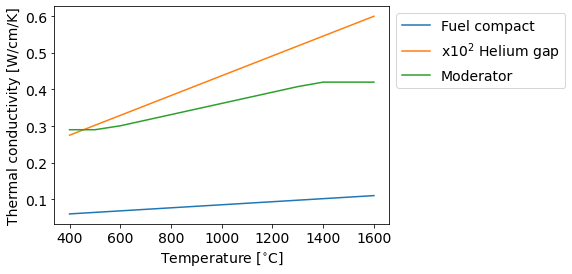

In [8]:
# Makes material properties plot
T = np.linspace(400, 1600, 13)

Tf = np.array([400, 1600])
kf = np.array([6., 11.])  # [W/m/K]
kf *= 1e-2  # [W/cm/K]
kfl = np.interp(T, Tf, kf)

Tg = np.array([400, 1600])
kg = 1e-2*np.array([27.5, 60])  # [W/m/K]
# kg *= 1e-2  # [W/cm/K]
kgl = np.interp(T, Tg, kg)

Tm = np.array([400, 530, 1380, 1600])
km = np.array([29., 29., 42., 42.])  # [W/m/K]
km *= 1e-2 # [W/cm/K]
kml = np.interp(T, Tm, km)

plt.figure()
plt.plot(T, kfl, label='Fuel compact')
plt.plot(T, kgl, label=r'x10$^2$ Helium gap')
plt.plot(T, kml, label='Moderator')
# plt.legend(loc='upper left', fontsize=14)
plt.legend(loc="upper left", bbox_to_anchor=(1., 1.), fancybox=True, fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Thermal conductivity [W/cm/K]', fontsize=14)
plt.xlabel('Temperature [$^{\circ}$C]', fontsize=14)
plt.savefig("val-unit-matprop", dpi=300, facecolor='w', bbox_inches="tight", transparent=False)